## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B testing is a method of comparing two versions of a webpage or app against each other to determine which one performs better. AB testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

In this project, we will perform A/B test for a company to compare between two version of web page one is old and the another is new, by the A/B test result we will help the company decided if they going to implement the new page or keep the old page.

### Note

If you rerun some of the cells the result of it will had a Simple change because we use the np.random.binomial on it.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read the dataset and display the head of it
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# display the number of rows in the dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# display the number of unique users in the dataset

df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# display the proportion of users converted

(df['converted'] == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#display the number of the new page and treatment didnt match

pd.crosstab(df.group, df.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


Based to the cell above we have 1928 in new_page and not in treatment, and we have 1965 treatment and not in the new_page, so we will calculate it to get the number of times they didnt match (1928+1965=3893).

f. Do any of the rows have missing values?

In [7]:
# check if there any missing value
df[df.isnull().any(axis=1)]

,user_id,timestamp,group,landing_page,converted


So we didnt have any missing value

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# create a new dataframe df2 from df where we remove the records where new_page and trement didn't line up
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
# check the shape of the dataframe2(df2)
df2.shape

(290585, 5)

So here we remove the records that is when new_page and trement didn't line up

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# display the number of unique user_id after remove the records from our dataset.

df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# check the duplicate user_id we had in our dataset.

df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# display the row information for the duplicated user_id in our dataset
df2[df2.duplicated('user_id', keep=False) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# remove one of the duplicated rows
df2.drop_duplicates('user_id', inplace=True)

C:\Users\435170245\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# check the duplicate has been removed or not

df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [16]:
# display the number of rows after removing the duplicate 

df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# here we display the probability of an individual converting regardless of the page
df2['converted'].mean()

0.11959708724499628

Probability of converting regardless of page is 0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# here we display the individual was in the control group, the probability of converting
df2.query('group =="control"').converted.mean()

0.1203863045004612

The individual was in the control group, the probability of converting is 0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# here we display the individual was in the treatment group, the probability of converting
df2.query('group =="treatment"').converted.mean()

0.11880806551510564

The individual was in the treatment group, the probability of converting is 0.1188

d. What is the probability that an individual received the new page?

In [20]:
#display the number of the landing_page and see the total of new_page on it

pd.crosstab(df2.group, df2.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,0,145274,145274
treatment,145310,0,145310
All,145310,145274,290584


So the total number of individual recived the new_page is 145310

In [21]:
# here we display the probability of receiving the new page
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

The probability of receiving the new page is 0.5001

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:**

From the result above a.through d. we saw there is the control group is littel bet higher than the treatment group in conversion and the result of control is 0.1204, and the treatmen group was 0.1188.

Accroding to our analysis the result didnt gave us a strong evidence if one page leads to more conversions.

So we had to do more in the next part.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# here we will display the Pnew, Pnew is p_old = p_new = converted rate of our dataset
p_new = df2['converted'].mean()
p_new

0.11959708724499628

So the Pnew is 0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# here we will display the Pold, Pold is p_old = p_new = converted rate of our dataset
p_old = df2['converted'].mean()
p_old

0.11959708724499628

So the Pold is 0.11959708724499628

c. What is $n_{new}$?

In [24]:
# here we will display the count of the new page in our dataset

n_new = df2.query('landing_page == "new_page"')['landing_page'].count()
n_new

145310

The count of new page is 145310

d. What is $n_{old}$?

In [25]:
# here we will display the count of the old page in our dataset

n_old = df2.query('landing_page == "old_page"')['landing_page'].count()
n_old

145274

The count of old page is 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# here we will simulate  N𝑛𝑒𝑤  transactions with a convert rate of  P𝑛𝑒𝑤  under the null
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17279

So the simulate of N𝑛𝑒𝑤  transactions with a convert rate of  P𝑛𝑒𝑤  under the null is 17279

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# here we will simulate N𝑜𝑙𝑑 transactions with a convert rate of  P𝑜𝑙𝑑  under the null
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17241

So the simulate of N𝑜𝑙𝑑 transactions with a convert rate of 𝑝𝑜𝑙𝑑 under the null is 17241

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# here we wil find the P𝑛𝑒𝑤 - P𝑜𝑙𝑑 from our simulated values in part e and f
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
p_diff

0.00023210755846529707

So the P𝑛𝑒𝑤  - P𝑜𝑙𝑑 from our simulated values is 0.00023210755846529707

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# here we will simulate 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using this same process similarly to the one we calculated in a-g above
p_diffs = []

for _ in range(10000):
    new_converted_simulation = np.random.binomial(n_new,p_new)/n_new
    old_converted_simulation = np.random.binomial(n_old,p_old)/n_old
    diff = new_converted_simulation - old_converted_simulation 
    p_diffs.append(diff)
    
# then we will convert p_diffs to an array

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

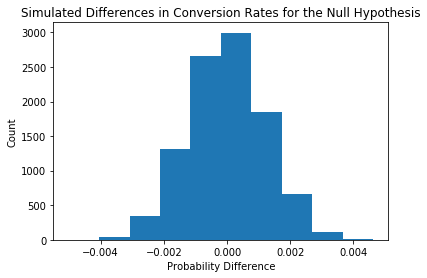

In [30]:
# here we will draw a histogram for p_diffs
plt.hist(p_diffs)
plt.title("Simulated Differences in Conversion Rates for the Null Hypothesis", fontsize=12)
plt.xlabel("Probability Difference", fontsize=10)
plt.ylabel('Count', fontsize=10);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# here we will calculate the actucl difference observed in our dataset
org_control_mean = df.query('group =="control"').converted.mean()
org_treatment_mean = df.query('group =="treatment"').converted.mean()
org_diff =  org_treatment_mean - org_control_mean 

# then we will calculate the propotion of the p_diffs are greater than the actual difference observed in our dataset
pvalue = (p_diffs > org_diff).mean()
pvalue

0.8894

so our P-value is 0.8894

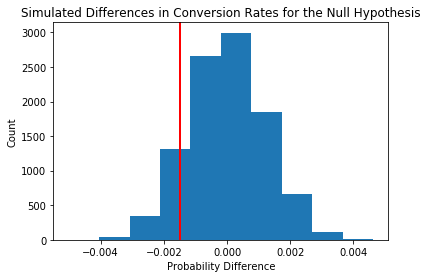

In [32]:
# here we wil draw a histogram and see where is the org_diff
plt.hist(p_diffs)
plt.title("Simulated Differences in Conversion Rates for the Null Hypothesis", fontsize=12)
plt.xlabel("Probability Difference", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.axvline(org_diff,c='r',linewidth = 2);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Pvalue is the probability of getting the results you did (or more extreme results) given that the null hypothesis is true.

So we calculated the Pvalue and its 0.8894.

If the p value is less than the alpha ( level of significance) than we must reject the null hypothesis. in our case the p value is high so we fail to reject the H0. the p value goes from 0 -1.

We think there is no difference between the new and old pages. conversion rate for new page is either same or worse than old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
# here we calculate the number of conversions for each page as well as the number of individuals who received each page
convert_old = len(df2.query('converted==1 and landing_page=="old_page"'))
convert_new = len(df2.query('converted==1 and landing_page=="new_page"'))
n_old = len(df2.query('landing_page== "old_page"'))
n_new = len(df2.query('landing_page== "new_page"'))
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
# here we use stats.proportions_ztest to compute your test statistic and p-value
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new,convert_old], nobs = [n_new,n_old], alternative ='larger' )
print ("z_score:",z_score)
print("p_value:",p_value)

z_score: -1.3109241984234394
p_value: 0.9050583127590245


In [35]:
# here we import norm from scipy and display the z-score
from scipy.stats import norm
print("z-score: ",norm.cdf(z_score))

z-score:  0.09494168724097551


In [36]:
# display the Critical Value
print("Critical Value: ",norm.ppf(1-(0.05/2)))

Critical Value:  1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

When the z-score is lower than the critical its mean we fail to reject the null, also the p-value is nearst to the p-value in part j above.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since this is a Yes-No type of variable, the appropriate approach is Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# set the intercept  to 1
df2['intercept'] = 1
# create a column which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
# display the dataset
df2.head()

C:\Users\435170245\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\435170245\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
# here we import the regression model and fit it by using the columns we created above in part b 'intercept'and'ab_page'
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# here we display the summary for result of the regression model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:54:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190. This p-value differs from the value in Part II due to the null and alternative hypothesis changing.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Some factors, when added, may change the company’s decision to switch to the new page, for example money and test duration it might cost the company alot of money.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# here read the new dataset and make a relation between it and the old one by using the join
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [41]:
# check the possible values for the country column and its count
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
### Create the necessary dummy variables
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US', "UK"]]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [43]:
# here we create ab_page column for each of both countries
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
# import the model
logit2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK' , 'US_ab_page', 'UK_ab_page']])
# fit the model
result2 = logit2.fit()
# display the summry
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        21:54:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

All the p-values are larger than alpha so we will fail to reject the null, and we can conclude that there is no evidence to suggest that the new page results has more conversions than the old page. Even when we take the countries variable did not lead to more conversion to the new page.

## Sources

sources: khan academy ( hypothesis test, p value, ztest), youtube ( hypothesis test, p value, ztest)

sources: http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

sources: http://slideplayer.com/slide/6183997/18/images/8/Linear+versus+Logistic+Regression.jpg

sources: https://medium.com/@saahil1292/statistics-101-p-value-z-value-4fa0514a3e7d

sources: https://www.youtube.com/watch?v=5FmxvmlOmfA

sources: https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/

sources: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html

sources: https://stackoverflow.com/